In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/dataset.csv"
data = pd.read_csv(path)

In [ ]:
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data_row_count, data_column_count = data.shape
print('Row Count:', data_row_count)
print('Column Count:', data_column_count)

Row Count: 5110
Column Count: 12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.id.nunique()

5110

In [ ]:
data = data.drop(columns ='id')
data.shape

(5110, 11)

In [ ]:
data.gender.value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
data['gender'] = data['gender'].replace('Other', list(data.gender.mode().values)[0])
data.gender.value_counts()


Female    2995
Male      2115
Name: gender, dtype: int64

In [ ]:
data_df = pd.DataFrame(data)

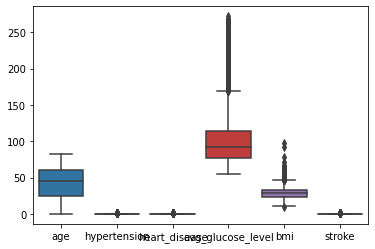

In [ ]:
import seaborn as sns
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(data = data)

In [ ]:
data.duplicated().value_counts()

False    5110
dtype: int64

In [ ]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [ ]:
missing(data)

,Missing_Number,Missing_Percent
stroke,0,0.0
smoking_status,0,0.0
bmi,0,0.0
avg_glucose_level,0,0.0
Residence_type,0,0.0
work_type,0,0.0
ever_married,0,0.0
heart_disease,0,0.0
hypertension,0,0.0
age,0,0.0


In [ ]:
data.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


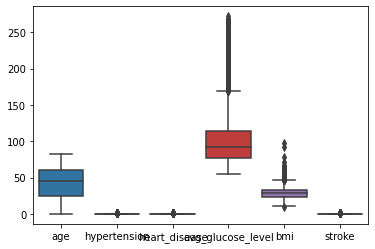

In [ ]:
sns.boxplot(data = data)

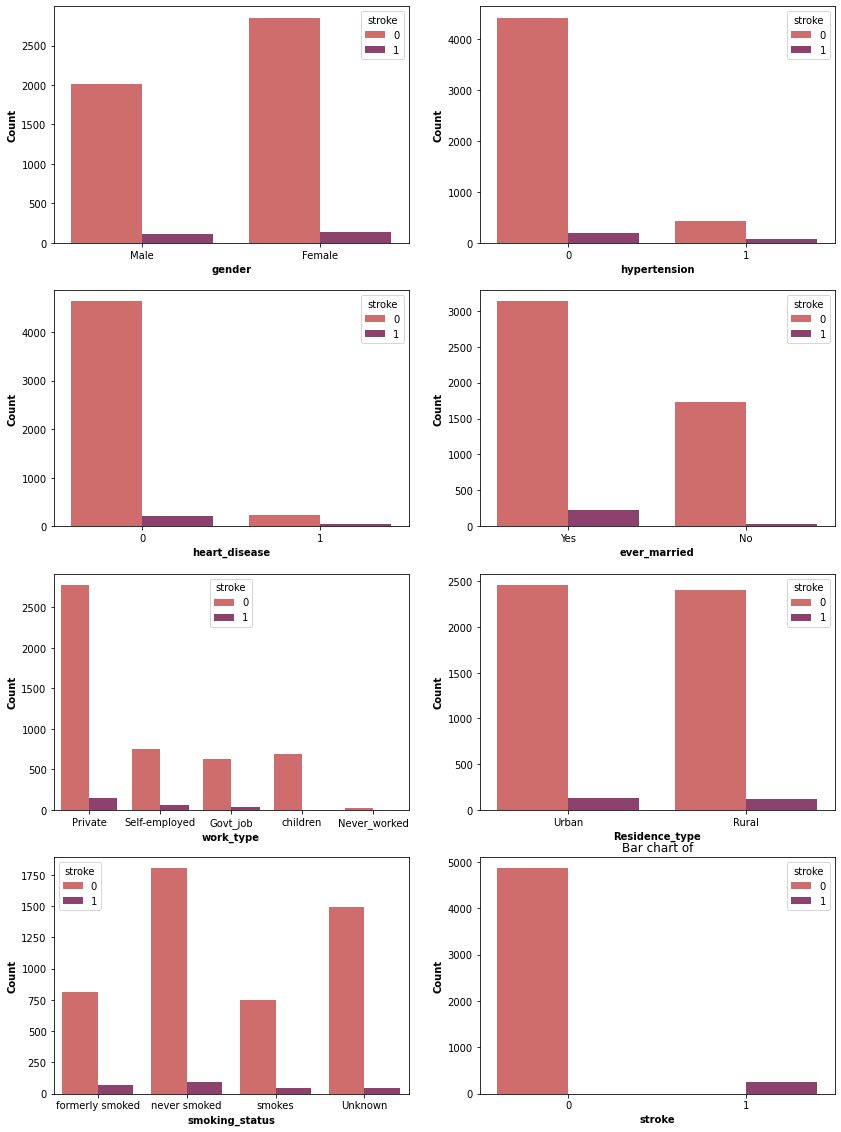

In [ ]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

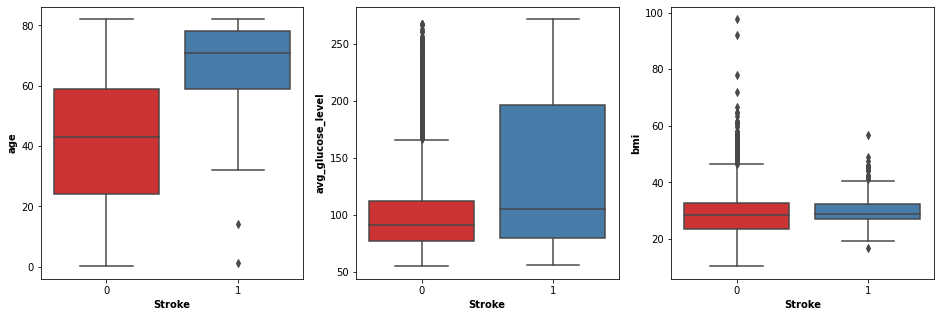

In [ ]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=data, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

In [ ]:
bmi_outliers=data.loc[data['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [ ]:
data["bmi"] = pd.to_numeric(data["bmi"])
data["bmi"] = data["bmi"].apply(lambda x: 50 if x>50 else x)

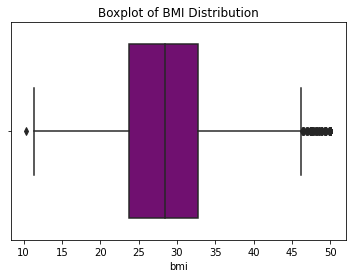

In [ ]:
sns.boxplot(data=data,x=data["bmi"],color='purple')
plt.title("Boxplot of BMI Distribution");

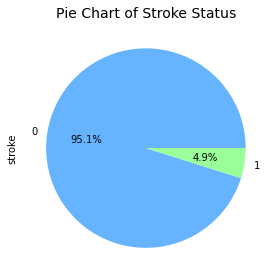

In [ ]:
plt.figure(figsize=(4,4))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

In [ ]:
y = data['stroke']
print(f'Percentage of patient has a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} -->\
     ({y.value_counts()[1]} patient)\nPercentage of patient does not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient has a stroke: % 4.87 -->     (249 patient)
Percentage of patient does not have a stroke: % 95.13 --> (4861 patient)


Correlation among various variables - Heatmap

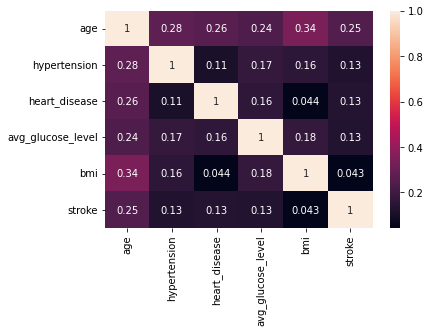

In [ ]:
sns.heatmap(data.corr(), annot=True);

In [ ]:
data.columns
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
data[numerical].describe().T

NameError: ignored

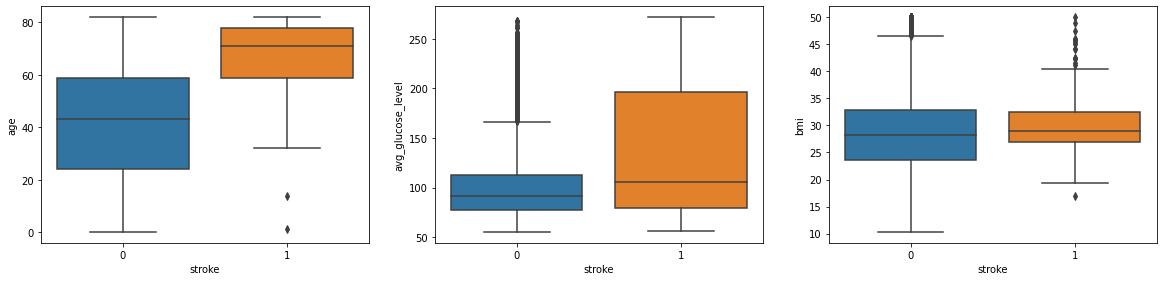

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in data.drop(columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']).columns:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke', y=feature, data=data)

In [ ]:
data[(data['age'] <= 14) & (data['stroke'] == 1)] 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.3200000,0,0,No,children,Urban,70.3700000,28.8932369,Unknown,1
245,Female,14.0000000,0,0,No,children,Rural,57.9300000,30.9000000,Unknown,1


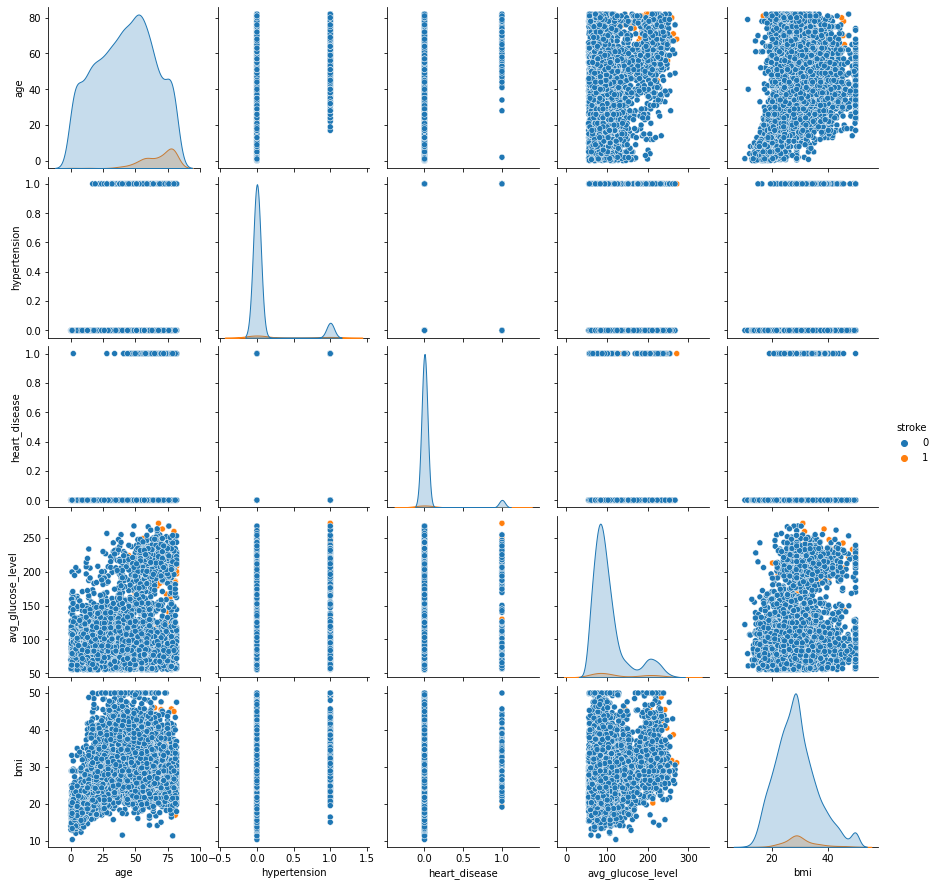

In [ ]:
sns.pairplot(data, hue="stroke");

Avg glucose level and Age

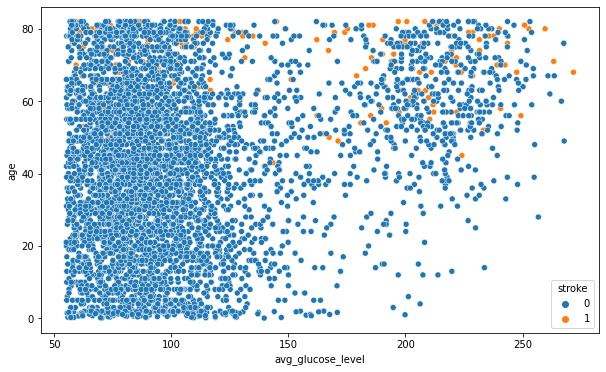

In [ ]:
sns.scatterplot(x = 'avg_glucose_level', y = 'age', hue = 'stroke', data = data);

Bmi and Age

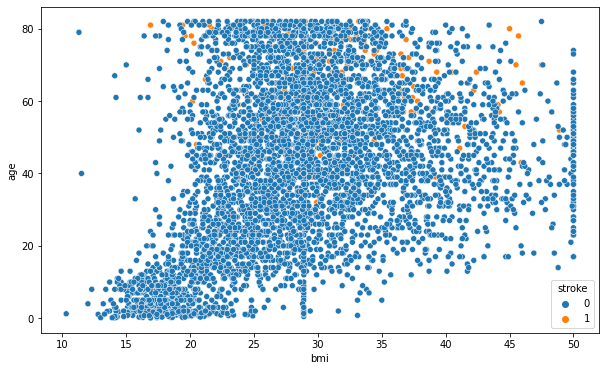

In [ ]:
sns.scatterplot(x = 'bmi', y = 'age', hue = 'stroke', data = data);

Bmi and Avg glucose level

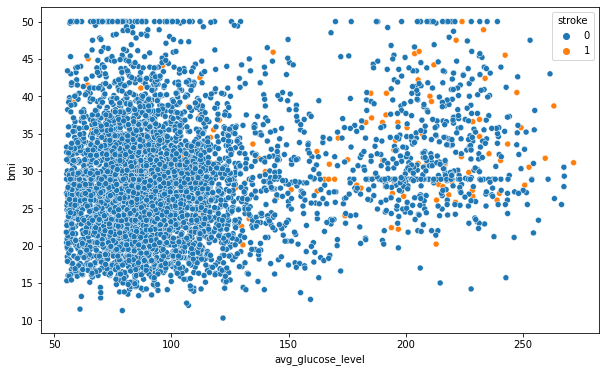

In [ ]:
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', hue = 'stroke', data = data);